**Importing Dependencies**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist

**Loading MNIST data from keras dataset**



In [ ]:
# loading data onto X_train, Y_train, X_test, Y_test
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
# checking the type of X_train
type(X_train)

numpy.ndarray

In [ ]:
# dimensions of X_train, Y_train, X_test, Y_test
# we have 60000 images and each image is a 28*28 image and it's a greyscale image
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
# printing the 11th image from X_train
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
# shape of 11th image
X_train[10].shape

(28, 28)

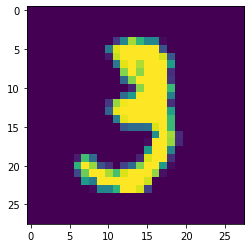

3


In [ ]:
# displaying the image
plt.imshow(X_train[10])
plt.show()

# printing the label
print(Y_train[10])

**Image Labels Analysis**

In [ ]:
# printing shape
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
# printing unique labels in Y_train and Y_test
print(np.unique(Y_train), np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# scaling the values
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
# printing 10th image from X_train_scaled
print(X_train_scaled[9])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building the Neural Network!**

In [ ]:
# setting up the layers of our neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(units = 50, activation = 'relu'),
    keras.layers.Dense(units = 50, activation = 'relu'),
    keras.layers.Dense(units = 10, activation = 'sigmoid')
])

In [ ]:
# compiling the neural network
model.compile(optimizer = 'Adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [66]:
# training the neural network
model.fit(X_train_scaled, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2744 - accuracy: 0.9125
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0800 - accuracy: 0.9765
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0693 - accuracy: 0.9796
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0622 - accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0549 - accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0509 - accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0456 - accuracy: 0.9864
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0423 - accuracy: 0.9874
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0394 - accuracy: 0.9880
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.037

**Accuracy on Test Data**

In [67]:
# getting loss and accuracy over test data
loss, accuracy = model.evaluate(X_test_scaled, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1309 - accuracy: 0.9714


In [68]:
# printing shape of X_test
X_test_scaled.shape

(10000, 28, 28)

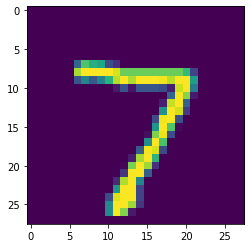

In [69]:
# first data point in test data
plt.imshow(X_test_scaled[0])

In [70]:
# priting true label (Y)
print(Y_test[0])

7


In [71]:
# seeing what the model predicts
prediction = model.predict(X_test_scaled)
print(prediction[0]) # model.predict for neural networks gives prediction probability for each class (0 - 9) for this data-point
print(np.argmax(prediction[0])) # use argmax to get the label

[1.3193488e-04 1.1189625e-04 1.2641728e-02 7.2149366e-02 8.5388997e-08
 5.5542588e-03 2.9710303e-12 9.9922550e-01 1.5637279e-04 4.4223666e-04]
7


In [72]:
# creating a list of predicted labels for test_data
predicted_labels = [np.argmax(i) for i in prediction]

In [73]:
# printing first 5 predicted_labels
print(predicted_labels[0:6])

[7, 2, 1, 0, 4, 1]


**Confusion Matrix**

In [74]:
# building a confusion matrix
conf_mat = tf.math.confusion_matrix(Y_test, predicted_labels)

In [75]:
# printing it...haha...
print(conf_mat)

tf.Tensor(
[[ 966    1    3    2    0    4    1    2    1    0]
 [   0 1123    3    3    0    1    1    1    3    0]
 [   3    4 1002    6    1    1    1    7    7    0]
 [   1    0    6  991    1    5    0    2    3    1]
 [   2    0    4    1  948    0    5    3    1   18]
 [   3    1    0   26    1  849    3    0    3    6]
 [   6    3    0    1    4   10  925    0    9    0]
 [   1    5   10    7    1    1    0  985    6   12]
 [   5    1    5    4    5    3    0    3  947    1]
 [   3    3    1    8    7    3    0    1    5  978]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

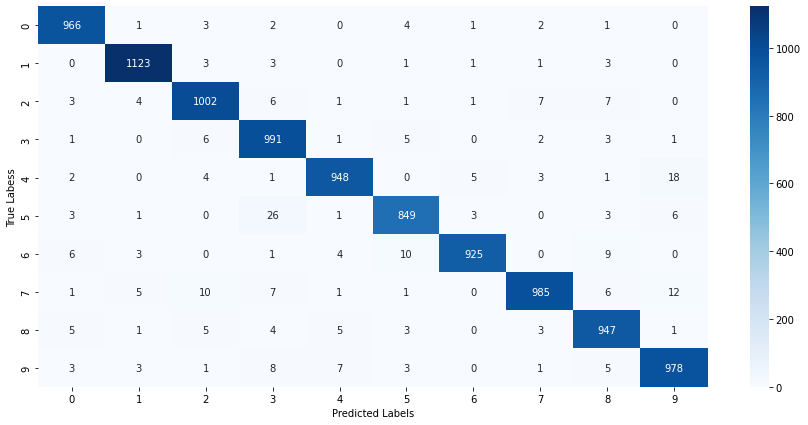

In [76]:
# making a heat-map
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Labess')
plt.xlabel('Predicted Labels')

**Making a Predictive System**

Enter image path: /content/MNIST_57_0.png
[[5.69849682e-14 2.07066536e-04 2.29081250e-12 5.70537628e-12
  5.71819143e-22 1.94742036e-08 4.48759892e-34 1.00000000e+00
  1.18927805e-32 2.20844267e-08]]


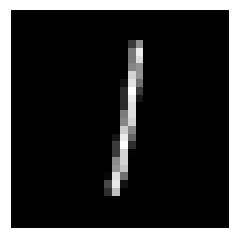

The image is :  7


In [92]:
# accepting input path
input_image_path = input("Enter image path: ")

# converting image to numpy array
input_image = cv2.imread(input_image_path)

# converting it to a greyscale image
input_image_grey = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

# reshaping the image
input_image_grey_final = cv2.resize(input_image_grey, (28,28))

# scaling the image
input_image_scaled = input_image_grey_final / 255
input_image_reshaped = np.reshape(input_image_scaled, [1,28,28])

# getting the prediction
prediction = model.predict(input_image_reshaped)
print(prediction)

# printing output
cv2_imshow(input_image)
print("The image is : ", np.argmax(prediction))